In [1]:
!git clone https://github.com/Tanveer2719/NIDS_Coursework.git

Cloning into 'NIDS_Coursework'...
remote: Enumerating objects: 111, done.
remote: Counting objects: 100% (111/111), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 111 (delta 37), reused 107 (delta 33), pack-reused 0 (from 0)
Receiving objects: 100% (111/111), 74.66 KiB | 5.33 MiB/s, done.
Resolving deltas: 100% (37/37), done.


In [2]:
%cd /kaggle/working/NIDS_Coursework/My_Code
!ls

/kaggle/working/NIDS_Coursework/My_Code
classification.py    main.ipynb     record_level_embedding.py
featureSelection.py  preprocess.py  transformer.py


In [3]:
%rm -r __pycache__

rm: cannot remove '__pycache__': No such file or directory


In [15]:
!git pull origin main

From https://github.com/Tanveer2719/NIDS_Coursework
 * branch            main       -> FETCH_HEAD
Already up to date.


In [3]:
import pandas as pd
import numpy as np

url_train = "https://raw.githubusercontent.com/Jehuty4949/NSL_KDD/master/KDDTrain%2B.txt"
url_test = "https://raw.githubusercontent.com/Jehuty4949/NSL_KDD/master/KDDTest%2B.txt"
columns_url = "https://raw.githubusercontent.com/Jehuty4949/NSL_KDD/master/Field%20Names.csv"

# Load column names
columns = pd.read_csv(columns_url, sep=',', header=None)
col_names = columns[0].tolist() + ['class', 'type']

# Load train and test data
train_df = pd.read_csv(url_train, names=col_names)
test_df = pd.read_csv(url_test, names=col_names)

# Drop the "type" column (not needed)
train_df.drop(columns=['type'], inplace=True)
test_df.drop(columns=['type'], inplace=True)

# Strip whitespace from class labels
for df in [train_df, test_df]:
    df['class'] = df['class'].str.strip()

# Combine train and test
full_df = pd.concat([train_df, test_df], ignore_index=True)
print(f"✔️ Combined dataset shape: {full_df.shape}")
print(f"🧾 Unique class labels: {full_df['class'].unique()}")

✔️ Combined dataset shape: (148517, 42)
🧾 Unique class labels: ['normal' 'neptune' 'warezclient' 'ipsweep' 'portsweep' 'teardrop' 'nmap'
 'satan' 'smurf' 'pod' 'back' 'guess_passwd' 'ftp_write' 'multihop'
 'rootkit' 'buffer_overflow' 'imap' 'warezmaster' 'phf' 'land'
 'loadmodule' 'spy' 'perl' 'saint' 'mscan' 'apache2' 'snmpgetattack'
 'processtable' 'httptunnel' 'ps' 'snmpguess' 'mailbomb' 'named'
 'sendmail' 'xterm' 'worm' 'xlock' 'xsnoop' 'sqlattack' 'udpstorm']


In [4]:
full_df.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune
6,0,tcp,private,S0,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
7,0,tcp,private,S0,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
9,0,tcp,private,S0,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune


In [5]:

# For NSL_KDD Dataset 
# Only 
category_map = {
    # Normal
    'normal': 'normal',

    # DoS
    'neptune': 'DoS', 'teardrop': 'DoS', 'smurf': 'DoS', 'pod': 'DoS', 'back': 'DoS', 'land': 'DoS',
    'apache2': 'DoS', 'mailbomb': 'DoS', 'processtable': 'DoS', 'udpstorm': 'DoS',

    # Probe
    'ipsweep': 'Probe', 'portsweep': 'Probe', 'nmap': 'Probe', 'satan': 'Probe', 'saint': 'Probe',
    'mscan': 'Probe', 'snmpgetattack': 'Probe', 'snmpguess': 'Probe',

    # R2L
    'guess_passwd': 'R2L', 'ftp_write': 'R2L', 'imap': 'R2L', 'multihop': 'R2L', 'warezclient': 'R2L',
    'warezmaster': 'R2L', 'phf': 'R2L', 'spy': 'R2L', 'xlock': 'R2L', 'xsnoop': 'R2L', 'sendmail': 'R2L',

    # U2R
    'rootkit': 'U2R', 'buffer_overflow': 'U2R', 'loadmodule': 'U2R', 'perl': 'U2R', 'httptunnel': 'U2R',
    'ps': 'U2R', 'sqlattack': 'U2R', 'xterm': 'U2R', 'worm': 'U2R', 'named': 'U2R'
}

# Apply mapping
full_df['class'] = full_df['class'].map(category_map)

# Check the result
print("Grouped classes:", full_df['class'].unique())


Grouped classes: ['normal' 'DoS' 'R2L' 'Probe' 'U2R']


In [6]:
target = full_df['class']
features = full_df.drop(columns=['class'])

features.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,udp,other,SF,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,tcp,private,S0,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,tcp,http,SF,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [7]:
from preprocess import Preprocess

pp = Preprocess()
processed_features = pp.fit_transform_df_auto(df = features,n_categorical_levels=64, expected_categorical_format='onehot')

print(processed_features.shape)
processed_features.head()


Encoding the 3 levels for protocol_type
Encoding the 64 levels for service
Encoding the 11 levels for flag
(148517, 116)


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_2,flag_3,flag_4,flag_5,flag_6,flag_7,flag_8,flag_9,flag_10,flag_11
0,0.0,0.294530,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,0.0,0.237128,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,False,False,False,False,False,False,False,False
3,0.0,0.259014,0.429008,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,0.0,0.251757,0.287837,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False


In [8]:
processed_target = pp.fit_target('class', target.values)
processed_target.head()

,class
0,4
1,4
2,0
3,4
4,4


In [9]:
processed_full_df = pd.concat([processed_features, processed_target], axis=1)
processed_full_df.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_3,flag_4,flag_5,flag_6,flag_7,flag_8,flag_9,flag_10,flag_11,class
0,0.0,0.294530,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,4
1,0.0,0.237128,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,4
2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,0
3,0.0,0.259014,0.429008,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,4
4,0.0,0.251757,0.287837,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,4


In [23]:
from featureSelection import PSOFeatureSelector

pso = PSOFeatureSelector()
selected_mask, selected_feature = pso.run_pso(df=processed_full_df, target_column='class', verbose=True)

selected_feature


=== Iteration 1/10 ===
Particle 1/20: Score = 0.8714  --> New personal best! Previous: -inf
*** New global best score found: 0.8714 (Particle 1) ***
Particle 2/20: Score = 0.8644  --> New personal best! Previous: -inf
Particle 3/20: Score = 0.8390  --> New personal best! Previous: -inf
Particle 4/20: Score = 0.8476  --> New personal best! Previous: -inf
Particle 5/20: Score = 0.8500  --> New personal best! Previous: -inf
Particle 6/20: Score = 0.8755  --> New personal best! Previous: -inf
*** New global best score found: 0.8755 (Particle 6) ***
Particle 7/20: Score = 0.8373  --> New personal best! Previous: -inf
Particle 8/20: Score = 0.8441  --> New personal best! Previous: -inf
Particle 9/20: Score = 0.8380  --> New personal best! Previous: -inf
Particle 10/20: Score = 0.8627  --> New personal best! Previous: -inf
Particle 11/20: Score = 0.8491  --> New personal best! Previous: -inf
Particle 12/20: Score = 0.8483  --> New personal best! Previous: -inf
Particle 13/20: Score = 0.8423 

Index(['dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'root_shell', 'num_root', 'num_shells',
       'num_outbound_cmds', 'is_guest_login', 'serror_rate', 'rerror_rate',
       'diff_srv_rate', 'dst_host_same_srv_rate',
       'dst_host_srv_diff_host_rate', 'protocol_type_1', 'protocol_type_2',
       'service_1', 'service_2', 'service_3', 'service_4', 'service_6',
       'service_8', 'service_10', 'service_12', 'service_13', 'service_15',
       'service_16', 'service_18', 'service_19', 'service_22', 'service_23',
       'service_25', 'service_26', 'service_27', 'service_29', 'service_31',
       'service_32', 'service_34', 'service_35', 'service_36', 'service_39',
       'service_40', 'service_42', 'service_43', 'service_46', 'service_48',
       'service_49', 'service_52', 'service_54', 'service_59', 'service_60',
       'service_61', 'service_63', 'flag_1', 'flag_2', 'flag_11'],
      dtype='object')

In [10]:
columns_to_keep = ['dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'root_shell', 'num_root', 'num_shells',
       'num_outbound_cmds', 'is_guest_login', 'serror_rate', 'rerror_rate',
       'diff_srv_rate', 'dst_host_same_srv_rate',
       'dst_host_srv_diff_host_rate', 'protocol_type_1', 'protocol_type_2',
       'service_1', 'service_2', 'service_3', 'service_4', 'service_6',
       'service_8', 'service_10', 'service_12', 'service_13', 'service_15',
       'service_16', 'service_18', 'service_19', 'service_22', 'service_23',
       'service_25', 'service_26', 'service_27', 'service_29', 'service_31',
       'service_32', 'service_34', 'service_35', 'service_36', 'service_39',
       'service_40', 'service_42', 'service_43', 'service_46', 'service_48',
       'service_49', 'service_52', 'service_54', 'service_59', 'service_60',
       'service_61', 'service_63', 'flag_1', 'flag_2', 'flag_11']

In [11]:
df_selected = processed_full_df[columns_to_keep].copy()
df_selected.shape

(148517, 58)

In [12]:
from record_level_embedding import RecordLevelEmbedder
numerical_columns = [
    'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
    'num_failed_logins', 'root_shell', 'num_root', 'num_shells',
    'num_outbound_cmds', 'is_guest_login', 'serror_rate', 'rerror_rate',
    'diff_srv_rate', 'dst_host_same_srv_rate', 'dst_host_srv_diff_host_rate'
]

embedder = RecordLevelEmbedder(selected_df = df_selected, numerical_columns = numerical_columns, embed_dimension= 64)

embedded_df = embedder.transform_to_df()

embedded_df.head()

2025-07-02 13:56:19.680651: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751464579.872199      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751464579.927065      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


[INFO] Initializing RecordLevelEmbedder...
[INFO] Detecting categorical blocks...
[INFO] Detected 3 categorical blocks:
   - protocol_type: 2 columns
   - service: 37 columns
   - flag: 3 columns
[INFO] Embedder initialized with embedding dimension 64.
[INFO] Building Keras embedding model...
   - Adding numerical input: dst_bytes
   - Adding numerical input: land
   - Adding numerical input: wrong_fragment
   - Adding numerical input: urgent
   - Adding numerical input: hot
   - Adding numerical input: num_failed_logins
   - Adding numerical input: root_shell
   - Adding numerical input: num_root
   - Adding numerical input: num_shells
   - Adding numerical input: num_outbound_cmds
   - Adding numerical input: is_guest_login
   - Adding numerical input: serror_rate
   - Adding numerical input: rerror_rate
   - Adding numerical input: diff_srv_rate
   - Adding numerical input: dst_host_same_srv_rate
   - Adding numerical input: dst_host_srv_diff_host_rate
   - Adding categorical block 

I0000 00:00:1751464592.223230      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1751464592.224034      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


[INFO] Projection complete. Output embedding shape: (64,)
[INFO] Model build complete.
[INFO] Preparing inputs for embedding. Number of rows: 148517
   - Prepared numerical input: dst_bytes
   - Prepared numerical input: land
   - Prepared numerical input: wrong_fragment
   - Prepared numerical input: urgent
   - Prepared numerical input: hot
   - Prepared numerical input: num_failed_logins
   - Prepared numerical input: root_shell
   - Prepared numerical input: num_root
   - Prepared numerical input: num_shells
   - Prepared numerical input: num_outbound_cmds
   - Prepared numerical input: is_guest_login
   - Prepared numerical input: serror_rate
   - Prepared numerical input: rerror_rate
   - Prepared numerical input: diff_srv_rate
   - Prepared numerical input: dst_host_same_srv_rate
   - Prepared numerical input: dst_host_srv_diff_host_rate
   - Prepared categorical block input: protocol_type
   - Prepared categorical block input: service
   - Prepared categorical block input: flag

I0000 00:00:1751464593.739223     116 service.cc:148] XLA service 0x7e4110009ea0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1751464593.739970     116 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1751464593.739991     116 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1751464593.770922     116 cuda_dnn.cc:529] Loaded cuDNN version 90300


  78/4642 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step 

I0000 00:00:1751464594.060205     116 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4642/4642 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step
[INFO] Embedding complete. Output shape: (148517, 64)
[INFO] Embedding DataFrame ready.


,embed_0,embed_1,embed_2,embed_3,embed_4,embed_5,embed_6,embed_7,embed_8,embed_9,...,embed_54,embed_55,embed_56,embed_57,embed_58,embed_59,embed_60,embed_61,embed_62,embed_63
0,0.195957,0.084888,0.208169,-0.102681,0.110002,-0.104688,-0.141733,-0.136283,0.108341,0.027179,...,-0.089363,0.001082,0.219406,-0.043483,0.004773,0.345089,-0.011930,0.110210,0.313576,0.036370
1,0.306137,0.006712,0.182749,0.029773,-0.027756,0.041645,-0.305761,-0.244410,0.023178,-0.215489,...,-0.207350,0.355790,0.161355,0.144882,0.037259,0.403411,0.143614,0.104252,0.132546,0.332614
2,-0.332476,0.470121,0.272141,0.082661,0.020870,-0.448523,-0.406016,-0.240326,-0.243595,-0.022210,...,0.042276,-0.015448,-0.153230,-0.326447,0.293880,0.357991,0.107025,0.176700,0.137007,-0.381632
3,0.147652,-0.159614,-0.083483,-0.263771,-0.113252,-0.144555,-0.099356,0.211503,0.188289,0.362412,...,0.265092,0.151821,-0.154702,-0.427650,-0.042454,0.625999,0.335556,0.049868,0.351097,-0.065981
4,0.191516,-0.146796,-0.069665,-0.272348,-0.126916,-0.184538,-0.058974,0.246093,0.246846,0.288148,...,0.202575,0.123345,-0.084297,-0.376598,-0.096684,0.561057,0.268768,0.031606,0.356209,-0.071861


In [13]:

### for debugging part. No effect to the model

import tensorflow as tf
from transformer import BasicTransformer


X_embed = embedded_df.values  # shape: (num_samples, embed_dim)
# 2. Add a sequence dimension for transformer: (batch_size, seq_len, embed_dim)
X_embed_seq = tf.expand_dims(X_embed, axis=1)  # shape: (batch_size, 1, embed_dim)

# 3. Create transformer
transformer = BasicTransformer(
    n_layers=2,
    internal_size=128,
    n_heads=4,
    verbose=True  # See progress!
)

# 4. Apply transformer encoder
output = transformer.apply(X_embed_seq, training=False)

print("Transformer output shape:", output.shape)


[BasicTransformer] Applying Encoder Block 1/2
[EncoderBlock] Input shape: (148517, 1, 64)
[EncoderBlock] Output shape: (148517, 1, 64)
[EncoderBlock] Input shape: (148517, 1, 64)
[EncoderBlock] Output shape: (148517, 1, 64)
[BasicTransformer] Applying Encoder Block 2/2
[EncoderBlock] Input shape: (148517, 1, 64)
[EncoderBlock] Output shape: (148517, 1, 64)
[EncoderBlock] Input shape: (148517, 1, 64)
[EncoderBlock] Output shape: (148517, 1, 64)
[BasicTransformer] Final output shape: (148517, 1, 64)
Transformer output shape: (148517, 1, 64)


In [15]:
# for debugging part, no affect to the model

from classification import LastTokenClassificationHead
# Create head
classification_head = LastTokenClassificationHead()

# Apply to select last token
pooled_output = classification_head.apply(output)

print("Pooled output shape:", pooled_output.shape)


Pooled output shape: (148517, 64)


In [22]:
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.models import Model

# 1️⃣ Model input shape: must match your preprocessed X
input_layer = Input(shape=(1, X_embed.shape[1]), name="record_input")

# 2️⃣ Pass through your transformer encoder stack
x = transformer.apply(input_layer, training=True)

# 3️⃣ Pool last token
x = classification_head.apply(x)

# 4️⃣ Optional MLP head
for i, layer_size in enumerate([128]):
    x = Dense(layer_size, activation="relu", name=f"classification_mlp_{i}_{layer_size}")(x)
    x = Dropout(0.1)(x)

# 5️⃣ Final output layer for multiclass
num_classes = len(processed_target['class'].unique())  # 5
output_layer = Dense(num_classes, activation="softmax", name="multiclass_output")(x)

# 6️⃣ Wrap the full model
model = Model(inputs=input_layer, outputs=output_layer)
model.summary()

# 7️⃣ Compile
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
    jit_compile=True
)


[BasicTransformer] Applying Encoder Block 1/2
[EncoderBlock] Input shape: (None, 1, 64)
[EncoderBlock] Output shape: (None, 1, 64)
[EncoderBlock] Input shape: (None, 1, 64)
[EncoderBlock] Output shape: (None, 1, 64)
[BasicTransformer] Applying Encoder Block 2/2
[EncoderBlock] Input shape: (None, 1, 64)
[EncoderBlock] Output shape: (None, 1, 64)
[EncoderBlock] Input shape: (None, 1, 64)
[EncoderBlock] Output shape: (None, 1, 64)
[BasicTransformer] Final output shape: (None, 1, 64)


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ record_input (InputLayer)            │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block_0_transformer_encoder          │ (None, 1, 64)               │         149,504 │
│ (TransformerEncoderBlock)            │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block_1_transformer_encoder          │ (None, 1, 64)               │         149,504 │
│ (TransformerEncoderBlock)            │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ slice_last (Lambda)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classification_mlp_0_128 (Dense)     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ multiclass_output (Dense)            │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 307,973 (1.17 MB)

 Trainable params: 307,973 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# split the data for training
from sklearn.model_selection import train_test_split

X_np = X_embed_seq.numpy() if hasattr(X_embed_seq, 'numpy') else np.array(X_embed_seq)
y = processed_target['class'].values

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X_np, y, test_size=0.2, random_state=42, stratify=y
)

print(X_train.shape, X_val.shape)

(118813, 1, 64) (29704, 1, 64)


In [25]:
# train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=64,
    epochs=10  
)


Epoch 1/10
[EncoderBlock] Input shape: (None, 1, 64)
[EncoderBlock] Output shape: (None, 1, 64)
[EncoderBlock] Input shape: (None, 1, 64)
[EncoderBlock] Output shape: (None, 1, 64)
[EncoderBlock] Input shape: (None, 1, 64)
[EncoderBlock] Output shape: (None, 1, 64)
[EncoderBlock] Input shape: (None, 1, 64)
[EncoderBlock] Output shape: (None, 1, 64)
1857/1857 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9226 - loss: 0.2308[EncoderBlock] Input shape: (None, 1, 64)
[EncoderBlock] Output shape: (None, 1, 64)
[EncoderBlock] Input shape: (None, 1, 64)
[EncoderBlock] Output shape: (None, 1, 64)
1857/1857 ━━━━━━━━━━━━━━━━━━━━ 26s 7ms/step - accuracy: 0.9226 - loss: 0.2308 - val_accuracy: 0.9618 - val_loss: 0.1067
Epoch 2/10
1857/1857 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9596 - loss: 0.1250 - val_accuracy: 0.9673 - val_loss: 0.1129
Epoch 3/10
1857/1857 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9642 - loss: 0.1126 - val_accuracy: 0.9478 - val_loss: 0.1480
Epoch 4/10
1857/1857 ━━

In [26]:
# evaluate the model
results = model.evaluate(X_val, y_val)
print(f"Validation loss: {results[0]:.4f}, Validation accuracy: {results[1]:.4f}")


929/929 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9743 - loss: 0.0889
Validation loss: 0.0856, Validation accuracy: 0.9749


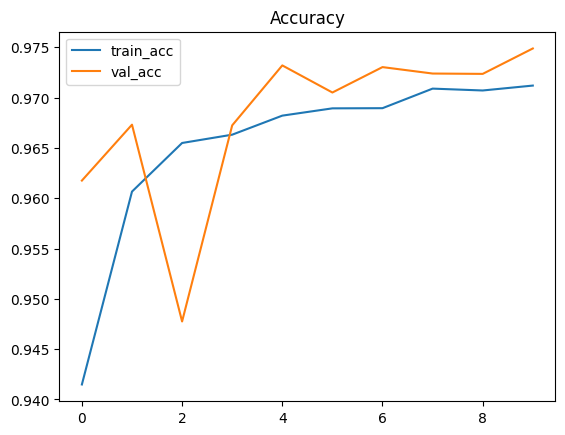

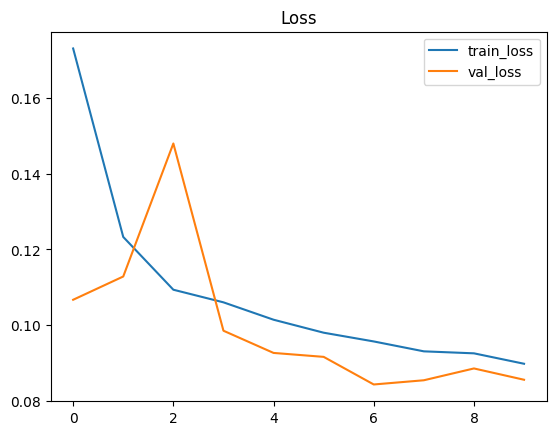

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title("Accuracy")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title("Loss")
plt.legend()
plt.show()
